# Maestría en Controles Industriales
### Entregable 5: Introducción EDO
### Autor: Diego Andres Rojas Gonzalez
### Docente: Dr. Oscar J. Suarez
### Matemática Aplicada
### Universidad de Pamplona

En este tutorial aprenderemos a manejar algunas de las utilidades que ofrece la librería scipy para el manejo de ecuaciones diferenciales ordinarias. 

## Importar librerias auxiliares

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

## 1.- Ecuaciones diferenciales ordinarias

La utilidad **integrate** de SciPy provee algunas utilidades para resolver ecuaciones diferenciales ordinarias númericamente de forma sencilla, como lo es el caso de la función **odeint()**. 

In [2]:
# odeint # resolver EDO
'''
1. Definir modelo
2. Crear función de modelo
3. Definir parámetros
4. Definir condiciones iniciales
5. definir intervalo de tiempo
6. Resolver sistema

#importante
integrate.odeint( F.Modelo, condiciones_iniciales, secuencia_de_tiempo, parámetros )
tantas condiciones iniciales como ecuaciones diferenciales
''' 


# Ejemplo 1 - Ecuaciones diferenciales de 1 variable
def ode1(x,t,a,b):
  # Definimos la expresión
  dx = -x + (a/b) * t
  return dx

# Definimos los parámetros
a = 2
b = 1

# Condición inicial
x0 = 0

# Definimos el intervalo de tiempo
t = np.linspace(0,3,34)

# Definimos la expresión para resolver
s1 = integrate.odeint(ode1, x0, t, args=(a,b))
s1.shape


(34, 1)

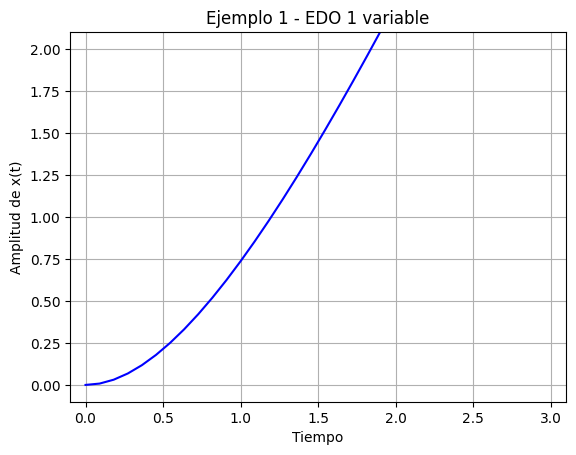

In [3]:
plt.figure()
plt.title('Ejemplo 1 - EDO 1 variable')
plt.plot(t,s1, '-b')
plt.xlim([-0.1,3.1])
plt.ylim([-0.1,2.1])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud de x(t)')
plt.grid()
plt.show()

Ecuaciones de primer orden con variables multiples

In [4]:
# Ejemplo para multiples variables
def edo2(x,t,a,b):
  # Definimos las ecuaciones diferenciales
  x1, x2 = x
  
  # Expressión
  dx = [x2, -a*x2 - b*np.sin(x1)]
  return dx

# Definimos los parámetros
a = 0.25
b = 5

# Definimos las condiciones iniciales
x0 = [np.pi-0.1, 0.0]
#x0 = [-np.pi, 5]
#x0 = [np.pi, 0.5]

# Definimos el intervalo de tiempo
t = np.linspace(0,100,1000)

# Resolvemos el sistema
s2 = integrate.odeint(edo2, x0, t, args=(a,b))


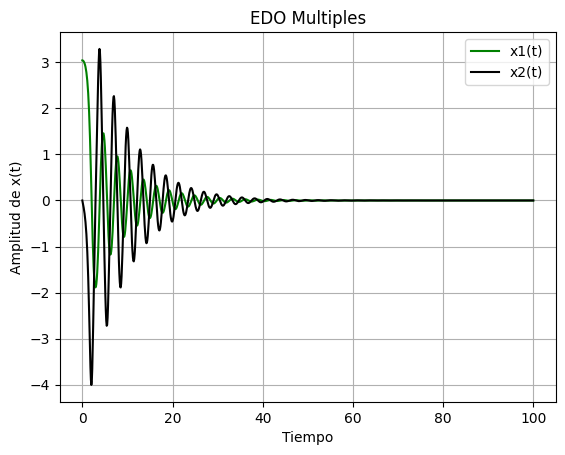

In [5]:
plt.figure(2)
plt.title('EDO Multiples')
plt.plot(t,s2[:,0], '-g', label='x1(t)')
plt.plot(t,s2[:,1], '-k', label='x2(t)')
# plt.xlim([-0.1,10.1])
# plt.ylim([-4,4])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud de x(t)')
plt.grid()
plt.legend()
plt.show()

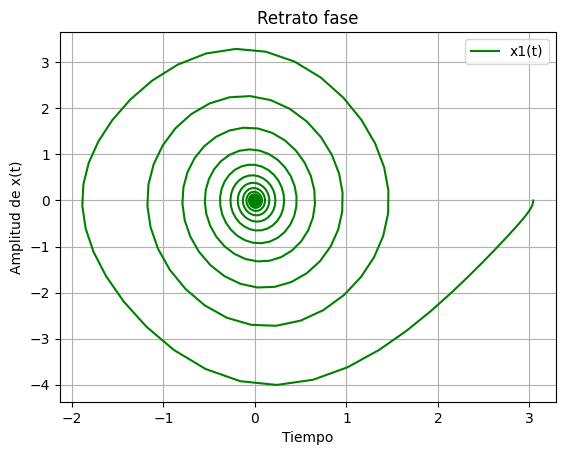

In [6]:
plt.figure(6)
plt.title('Retrato fase')
plt.plot(s2[:,0],s2[:,1], '-g', label='x1(t)')
# plt.xlim([-0.1,10.1])
# plt.ylim([-4,4])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud de x(t)')
plt.grid()
plt.legend()
plt.show()

# Regula y cero es un punto de equilibrio estable

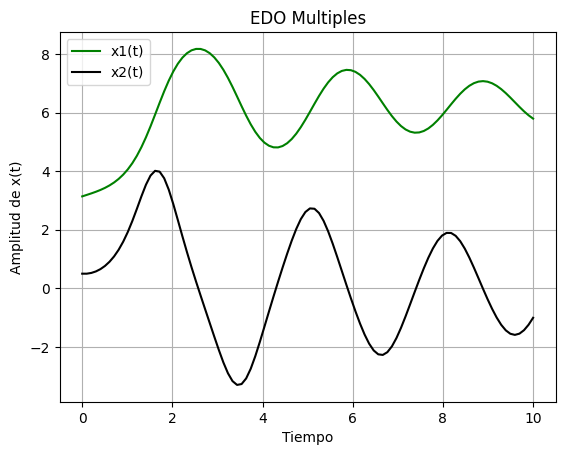

In [7]:
x0 = [np.pi, 0.5]
t = np.linspace(0,10,100)
s2 = integrate.odeint(edo2, x0, t, args=(a,b))
plt.figure(3)
plt.title('EDO Multiples')
plt.plot(t,s2[:,0], '-g', label='x1(t)')
plt.plot(t,s2[:,1], '-k', label='x2(t)')
# plt.xlim([-0.1,10.1])
# plt.ylim([-4,4])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud de x(t)')
plt.grid()
plt.legend()
plt.show()

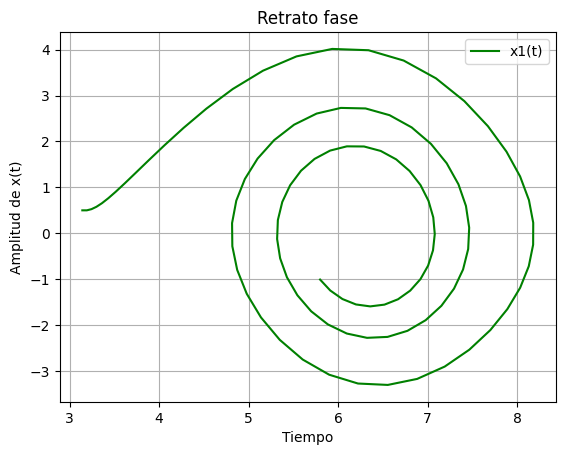

In [8]:
plt.figure(4)
plt.title('Retrato fase')
plt.plot(s2[:,0],s2[:,1], '-g', label='x1(t)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud de x(t)')
plt.grid()
plt.legend()
plt.show()

## 2.- Sistemas caóticos

### a) Atractor de Chen

Modelo matemático

\[
\begin{align*}
\frac{dx_1}{dt} &= a(y-x) \\
\frac{dx_2}{dt} &= x(c-a) - xz + cy \\
\frac{dx_3}{dt} &= xy - bz \\
\end{align*}
\]


In [9]:
# definimos el modelo
def edo3(f,t,a,b,c):
  # Definimos las ecuaciones diferenciales
  x, y, z = f
  
  # Expressión
  df = [
    a*(y-x),
    x*(c-a)-x*z+c*y,
    x*y-b*z
  ]
  return df

# Definimos los parámetros
#a = 10
#b = 28
#c = 8/3

a = 35
b = 3
c = 28

# Definimos las condiciones iniciales
f0 = [20,0,20]

# Definimos el intervalo de tiempo
t = np.linspace(0,50,10000)

# Resolvemos el sistema
s3 = integrate.odeint(edo3, f0, t, args=(a,b,c))

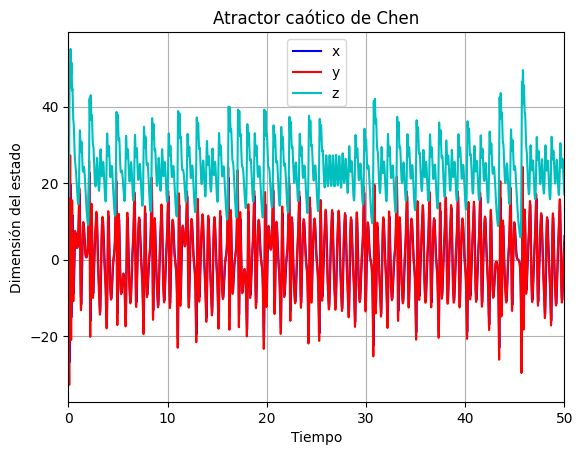

In [10]:

plt.figure(7)
plt.title('Atractor caótico de Chen')
plt.plot(t,s3[:,0], '-b', label='x')
plt.plot(t,s3[:,1], '-r', label='y')
plt.plot(t,s3[:,2], '-c', label='z')
plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Dimensión del estado')
plt.grid()
plt.legend()
plt.show()

In [11]:
s3.shape

(10000, 3)

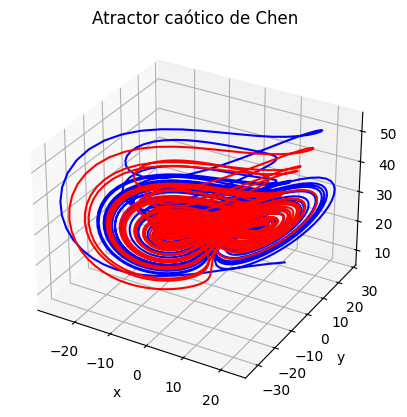

In [12]:


fig = plt.figure(8)
ax = plt.axes(projection='3d')
ax.plot3D(s3[0:5000,0], s3[0:5000,1], s3[0:5000,2], 'b')
ax.plot3D(s3[5000:10000,0], s3[5000:10000,1], s3[5000:10000,2], 'r')
plt.title('Atractor caótico de Chen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Probemos el sistema con diferentes parámetros

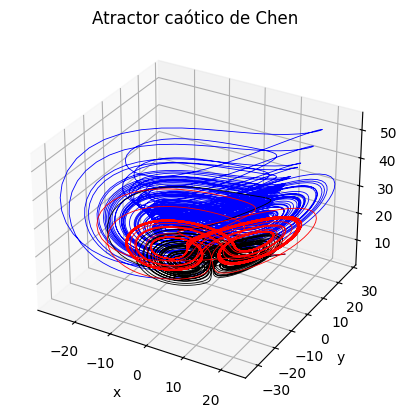

In [13]:
s3a = integrate.odeint(edo3, f0, t, args=(35,3,28))
s3b = integrate.odeint(edo3, f0, t, args=(30,3,20))
s3c = integrate.odeint(edo3, f0, t, args=(55,4,35))

fig = plt.figure(8)
ax = plt.axes(projection='3d')
ax.plot3D(s3a[:,0], s3a[:,1], s3a[:,2], 'b', linewidth=0.6)
ax.plot3D(s3b[:,0], s3b[:,1], s3b[:,2], 'k', linewidth=0.6)
ax.plot3D(s3c[:,0], s3c[:,1], s3c[:,2], 'r', linewidth=0.6)
plt.title('Atractor caótico de Chen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
"""
Constantes

k1 p53 degradation 8.25 × 10−4
k2 Mdm2 creation 4.95 × 10−4
k3 Mdm2-mRNA creation 1.0 × 10−4
k4 Mdm2-mRNA degradation 1.0 × 10−4
k5 Mdm2 degradation 4.33 × 10−4
k6 p53 synthesis 0.078
k7 Mdm2-p53 degradation 8.25 × 10−4
k8 Mdm2-p53 synthesis 11.55 × 10−4
k9 Mdm2-p53 dissociation 11.55 × 10−6
k10 ATM activation 1.0 × 10−4
k11 ATM deactivation 5.0 × 10−4
k12 Phosphorylation of p53 5.0 × 10−4
k13 Dephosphorylation of p53 5.0 × 10−1
k14 p300 degradation 1.0 × 10−4
k15 p53-p300 formation 1.0 × 10−4
k16 Acetylation of p53 1.0 × 10−4
k17 Deacetylation of p53 1.0 × 10−5
k18 Creation of Mdm2-HDAC1 2.0 × 10−4
k19 Creation of Mdm2-p53-p300 5.0 × 10−4
k20 Formation of Mdm2-p300 5.0 × 10−4
k21 Dissociation of Mdm2-p53-p300 1.0 × 10−4
k22 Degradation of HDAC1 1.0 × 10−4
k23 p300 synthesis 0.08
k24 HDAC1 synthesis 2.0 × 10−4
"""

"""
Modelo
x˙ 1 = − k14x1 − k15x1x7 − k19x4x1 − k20x11x1 + k23,
x˙ 2 = − k18x11x2 − k22x2 + k24,
x˙ 3 =k3x8 − k4x3,
x˙ 4 = − k7x4 + k8x8x11 − k9x4 − k19x4x1,
x˙ 5 = − k10x5 + k11x6,
x˙ 6 =k10x5 − k11x6 − k12x8x6,
x˙ 7 =k12x8x6 − k13x7 − k15x7x1, (4)
x˙ 8 = − k1x8x14 + k6 − k8x8x11 + k9x4 − k12x8x6 + k13x7 + k17x10x12,
x˙ 9 =k15x1x7 − k16x9 + k21x13,
x˙ 10 =k16x9 − k17x10x12,
x˙ 11 =k2x3 − k5x11 + k7x4 − k8x8x11 + k9x4 − k18x11x2 − k20x11x1 + k21x13,
x˙ 12 = − k17x10x12 + k18x11x2,
x˙ 13 =k19x4x1 − k21x13,
x˙ 14 = − k1x8x14 + k20x11x1,
"""



def edo4(x,t, k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24):

  x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14 = x

  dx = [
    -k14*x1 - k15*x1*x7 - k19*x4*x1 - k20*x11*x1 + k23, 
    -k18*x11*x2 - k22*x2 + k24,
    k3*x8 - k4*x3,
    -k7*x4 + k8*x8*x11 - k9*x4 - k19*x4*x1,
    -k10*x5 + k11*x6,
    k10*x5 - k11*x6 - k12*x8*x6,
    k12*x8*x6 - k13*x7 - k15*x7*x1,
    -k1*x8*x14 + k6 - k8*x8*x11 + k9*x4 - k12*x8*x6 + k13*x7 + k17*x10*x12,
    k15*x1*x7 - k16*x9 + k21*x13,
    k16*x9 - k17*x10*x12,
    k2*x3 - k5*x11 + k7*x4 - k8*x8*x11 + k9*x4 - k18*x11*x2 - k20*x11*x1 + k21*x13,
    -k17*x10*x12 + k18*x11*x2,
    k19*x4*x1 - k21*x13,
    -k1*x8*x14 + k20*x11*x1
  ]
  
  return dx

In [35]:
# definimos las condiciones iniciales

k1 = 8.25*10**-4
k2 = 4.95*10**-4
k3 = 1*10**-4
k4 = 1*10**-4
k5 = 4.33*10**-4
k6 = 0.078
k7 = 8.25*10**-4
k8 = 11.55*10**-4
k9 = 11.55*10**-6
k10 = 1*10**-4
k11 = 5*10**-4
k12 = 5*10**-4
k13 = 5*10**-1
k14 = 1*10**-4
k15 = 1*10**-4
k16 = 1*10**-4  
k17 = 1*10**-5
k18 = 2*10**-4
k19 = 5*10**-4
k20 = 5*10**-4
k21 = 1*10**-4
k22 = 1*10**-4
k23 = 0.08
k24 = 2*10**-4

# Definimos las condiciones iniciales
f0 = [0,0,0,0,0,0,0,10,0,0,150,0,0,0]

# Definimos el intervalo de tiempo
t = np.linspace(0, 48,1000)

# Resolvemos el sistema
s4 = integrate.odeint(edo4, f0, t*3600, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24))
s4.shape


(1000, 14)

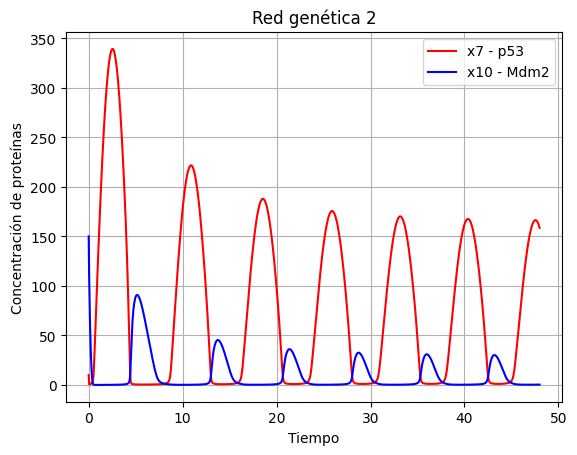

In [24]:

plt.figure(9)
plt.title('Modelo de p53')
# def x8 y x14
plt.plot(t,s4[:,7], '-r', label='x7 - p53')
plt.plot(t,s4[:,10], '-b', label='x10 - Mdm2')
plt.title("Red genética 2")
# oscilatorio
#plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de proteínas')
plt.grid()
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


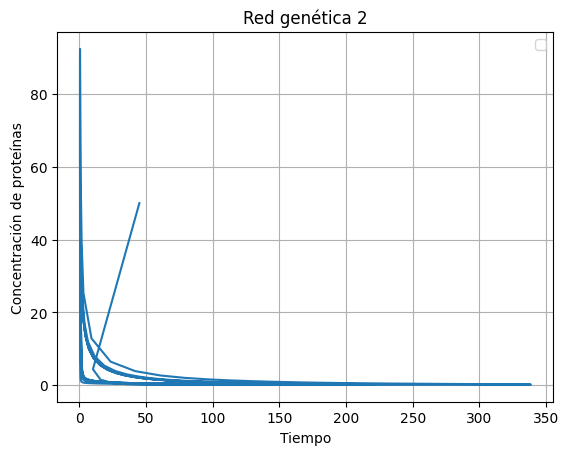

In [73]:
# definimos las condiciones iniciales

k1 = 8.25*10**-4
k2 = 4.95*10**-4
k3 = 1*10**-4
k4 = 1*10**-4
k5 = 4.33*10**-4
k6 = 0.078
k7 = 8.25*10**-4
k8 = 11.55*10**-4
k9 = 11.55*10**-6
k10 = 1*10**-4
k11 = 5*10**-4
k12 = 5*10**-4
k13 = 5*10**-1
k14 = 1*10**-4
k15 = 1*10**-4
k16 = 1*10**-4  
k17 = 1*10**-5
k18 = 2*10**-4
k19 = 5*10**-4
k20 = 5*10**-4
k21 = 1*10**-4
k22 = 1*10**-4
k23 = 0.08
k24 = 2*10**-4

# Definimos las condiciones iniciales
f0 = [0,0,0,0,0,0,0,45,0,0,50,0,0,0]

# Definimos el intervalo de tiempo
t = np.linspace(0, 48,1000)

# Resolvemos el sistema
s4 = integrate.odeint(edo4, f0, t*3600, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24))


plt.figure(9)
plt.title('Modelo de p53')
# def x8 y x14
plt.plot(s4[:,7],s4[:,10])
plt.title("Red genética 2")
# oscilatorio
#plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de proteínas')
plt.grid()
plt.legend()

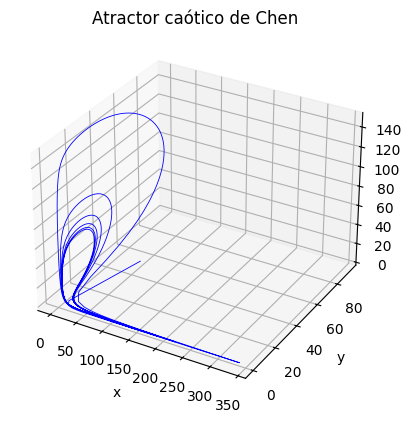

In [76]:
fig = plt.figure(8)
ax = plt.axes(projection='3d')
ax.plot3D(s4[:,7], s4[:,10], s4[:,13], 'b', linewidth=0.6)
plt.title('Atractor caótico de Chen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

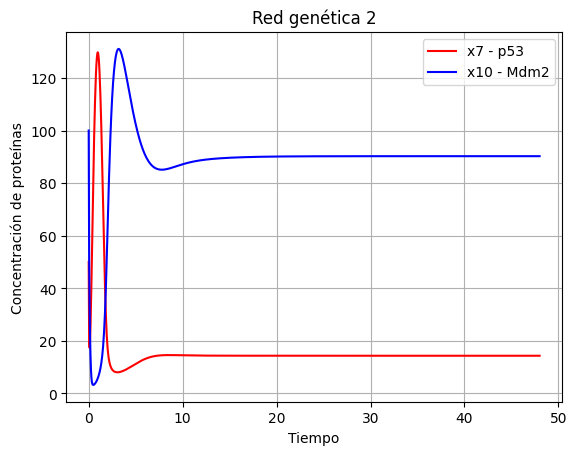

In [34]:
k2 = 2.95*10**-3
k7 = 8.25*10**-5
k8 = 11.55*10**-5
k9 = 11.55*10**-5
k23 = 0.025
s4 = integrate.odeint(edo4, f0, t*3600, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24))
f0 = [0,0,0,0,0,0,0,50,0,0,100,0,0,0]

# cancerigeno
plt.figure(9)
plt.title('Modelo de p53')
# def x8 y x14
plt.plot(t,s4[:,7], '-r', label='x7 - p53')
plt.plot(t,s4[:,10], '-b', label='x10 - Mdm2')
plt.title("Muerte celular sobre expresada")

#plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de proteínas')
plt.grid()

plt.legend()

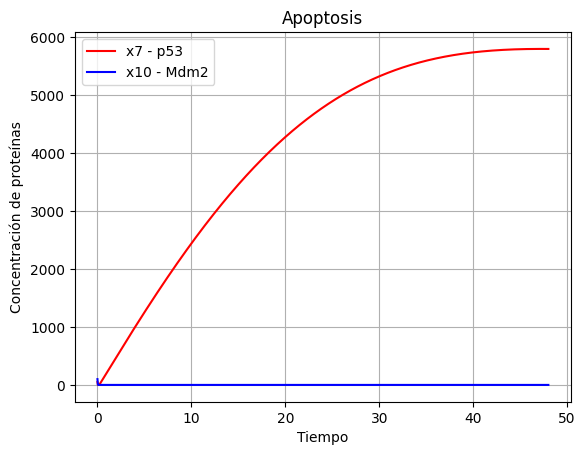

In [47]:
k1 = 8.25*10**-4
k2 = 4.95*10**-4
k3 = 1*10**-4
k4 = 1*10**-4
k5 = 4.33*10**-4
k6 = 0.078
k7 = 8.25*10**-4
k8 = 11.55*10**-4
k9 = 11.55*10**-6
k10 = 1*10**-4
k11 = 5*10**-4
k12 = 5*10**-4
k13 = 5*10**-1
k14 = 1*10**-4
k15 = 1*10**-4
k16 = 1*10**-4  
k17 = 1*10**-5
k18 = 2*10**-4
k19 = 5*10**-4
k20 = 5*10**-4
k21 = 1*10**-4
k22 = 1*10**-4
k23 = 0.08
k24 = 2*10**-4

k3 = 1*10**-5
k4 = 1*10**-3
k23 = 0.8


s4 = integrate.odeint(edo4, f0, t*3600, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24))
f0 = [0,0,0,0,0,0,0,50,0,0,100,0,0,0]

#apoptosis
plt.figure(9)
plt.title('Modelo de p53')
# def x8 y x14
plt.plot(t,s4[:,7], '-r', label='x7 - p53')
plt.plot(t,s4[:,10], '-b', label='x10 - Mdm2')
plt.title("Apoptosis")

#plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de proteínas')
plt.grid()
plt.legend()

(1000, 14)


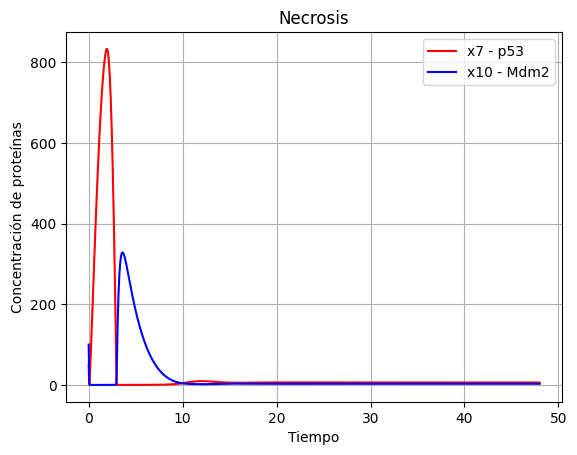

In [68]:
#Necrosis
k1 = 8.25*10**-4
k2 = 4.95*10**-4
k3 = 1*10**-4
k4 = 1*10**-4
k5 = 4.33*10**-4
k6 = 0.078
k7 = 8.25*10**-4
k8 = 11.55*10**-4
k9 = 11.55*10**-6
k10 = 1*10**-4
k11 = 5*10**-4
k12 = 5*10**-4
k13 = 5*10**-1
k14 = 1*10**-4
k15 = 1*10**-4
k16 = 1*10**-4  
k17 = 1*10**-5
k18 = 2*10**-4
k19 = 5*10**-4
k20 = 5*10**-4
k21 = 1*10**-4
k22 = 1*10**-4
k23 = 0.08
k24 = 2*10**-4


k1 = 1.25*10**-6
k6 = 0.2
k8 = 11.55*10**-3


s4 = integrate.odeint(edo4, f0, t*3600, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24))
f0 = [0,0,0,0,0,0,0,50,0,0,100,0,0,0]
print(s4.shape)

plt.figure(9)
plt.title('Modelo de p53')
# def x8 y x14
plt.plot(t,s4[:,7], '-r', label='x7 - p53')
plt.plot(t,s4[:,10], '-b', label='x10 - Mdm2')
plt.title("Necrosis")

#plt.xlim([0,50])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de proteínas')
plt.grid()
plt.legend()
